In [50]:
import pandas as pd

# What are the 5 most popular trips that you would call "commuter trips"?

LOAD DATA FRAMES:

In [51]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_evening_trips`' > pop_evening_trips.csv

Waiting on bqjob_r73c4d718cac995cd_00000174f521264c_1 ... (0s) Current status: DONE   


In [52]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_evening_trips_subscribers`' > pop_evening_trips_subscribers.csv

Waiting on bqjob_r36130bf23855867d_00000174f5212dc4_1 ... (0s) Current status: DONE   


In [53]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_morning_trips`' > pop_morning_trips.csv

Waiting on bqjob_r4c54c45527a06781_00000174f5213546_1 ... (0s) Current status: DONE   


In [54]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_morning_trips_subscribers`' > pop_morning_trips_subscribers.csv

Waiting on bqjob_r6cac44c91bf74454_00000174f5213c46_1 ... (0s) Current status: DONE   


In [55]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_trips`' > most_popular_trips.csv

Waiting on bqjob_r3a0dc691624a0742_00000174f5214383_1 ... (0s) Current status: DONE   


In [56]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_trips_subscribers`' > most_popular_trips_subscribers.csv

Waiting on bqjob_r49ce7a954fcd9f6_00000174f5214a99_1 ... (0s) Current status: DONE   


In [57]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.num_trips_for_hour_subscriber`' > customer_v_subscriber.csv

Waiting on bqjob_r774b3ac5b120a102_00000174f521530f_1 ... (0s) Current status: DONE   


In [58]:
pop_evening_trips, pop_evening_trips_subscribers = pd.read_csv('pop_evening_trips.csv'), pd.read_csv('pop_evening_trips_subscribers.csv')

In [59]:
pop_morning_trips, pop_morning_trips_subscribers = pd.read_csv('pop_morning_trips.csv'), pd.read_csv('pop_morning_trips_subscribers.csv')

In [60]:
most_popular_trips, most_popular_trips_subscribers = pd.read_csv('most_popular_trips.csv'), pd.read_csv('most_popular_trips_subscribers.csv')

In [71]:
customerVSsubscriber = pd.read_csv('customer_v_subscriber.csv')

### The 5 most popular trips called commuter trips are:

Overall:

In [62]:
most_popular_trips

,start_station_name,end_station_name,top_5_commutes
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


In the evening:

In [63]:
pop_evening_trips

,start_station_name,end_station_name,number_evening_commutes
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4456
1,Embarcadero at Sansome,Steuart at Market,4282
2,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4180
3,2nd at South Park,Market at Sansome,3573
4,Steuart at Market,San Francisco Caltrain (Townsend at 4th),3567


And in the morning:

In [64]:
pop_morning_trips

,start_station_name,end_station_name,number_morning_commutes
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4842
1,Steuart at Market,2nd at Townsend,3837
2,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),3817
3,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3622
4,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,3620


### Most commuters are likely to be subscribers because they rely on the bikeshare system to commute daily, so it is cheaper for them to subscribe then pay as a regular customer everyday. These are the 5 most popular trips for subscribers:

#### Here is a bar graph to visualize the number of trips taken by customers vs. subscribers throughout the day. Subscribers makeup the most trips throughout the day, especially during commuter hours- around 8 AM and 5 PM. The tables following this graph illustrate this idea.

In [79]:
customerVSsubscriber_for_plot = customerVSsubscriber.pivot(index= 'hour_of_day', columns = 'subscriber_type', values = 'count_trips_taken')

<AxesSubplot:xlabel='hour_of_day'>

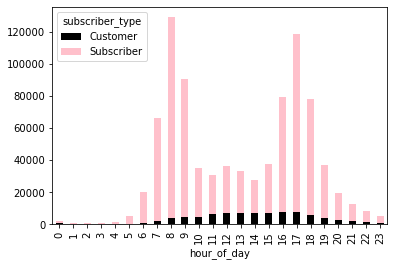

In [80]:
customerVSsubscriber_for_plot.plot.bar(stacked = True, color = {'Customer': 'black', 'Subscriber': 'pink'})

In [24]:
most_popular_trips_subscribers

,start_station_name,end_station_name,top_5_commutes
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8305
1,2nd at Townsend,Harry Bridges Plaza (Ferry Building),6931
2,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6641
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6332
4,Embarcadero at Sansome,Steuart at Market,6200


In [25]:
pop_evening_trips_subscribers

,start_station_name,end_station_name,number_evening_commutes
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4268
1,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4088
2,Embarcadero at Sansome,Steuart at Market,4009
3,2nd at South Park,Market at Sansome,3510
4,Steuart at Market,San Francisco Caltrain (Townsend at 4th),3469


In [26]:
pop_morning_trips_subscribers

,start_station_name,end_station_name,number_morning_commutes
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4774
1,Steuart at Market,2nd at Townsend,3786
2,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),3779
3,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3599
4,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,3567


# What are your recommendations for offers (justify based on your findings)?

Bike Trips on the 6 Most Popular Holidays

In [10]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT COUNT(DISTINCT(bike_number)) FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE (EXTRACT(MONTH FROM start_date))= 12 AND (EXTRACT(DAY FROM start_date)) = 25' > christmas.csv

Waiting on bqjob_r7b3429809dd7dd10_00000174ec3db909_1 ... (0s) Current status: DONE   


In [11]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT COUNT(DISTINCT(bike_number)) FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE (EXTRACT(MONTH FROM start_date))= 10 AND (EXTRACT(DAY FROM start_date)) = 31' > halloween.csv

Waiting on bqjob_r11011fe21268a6e4_00000174ec3def60_1 ... (0s) Current status: DONE   


In [12]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT COUNT(DISTINCT(bike_number)) FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE (EXTRACT(MONTH FROM start_date))= 2 AND (EXTRACT(DAY FROM start_date)) = 14' > valentinesday.csv

Waiting on bqjob_r1c695f1ae08c4643_00000174ec3eb720_1 ... (0s) Current status: DONE   


In [ ]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 ' ' > 

LOADING DATA FRAMES

In [1]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_evening_trips`' >acsv.csv

Waiting on bqjob_r2a86312513e35460_00000174efc8325a_1 ... (0s) Current status: DONE   


VISUALIZATIONS